In [2]:
import numpy as np
import pandas as pd
import re
from scipy.stats import norm

from matplotlib import pyplot as plt
from data_util import create_dataset
from sklearn.preprocessing import StandardScaler

pd.options.display.max_rows = 100
pd.set_option('display.max_rows', None)

# Read in data

###  Note that the loaded data has already been log_2(x+1) transformed from the raw values

In [3]:
# Read in new data
filepath_new = 'ClinicalFiles/mmc1-tony.xlsx'
data_new = pd.read_excel(filepath_new,index_col=0)

In [4]:
data_BRCA_bone = create_dataset(cancer_type = 'BRCA',
                                new_tumor_event_site = 'Bone',
                                data_new = data_new,
                                filepath_ge = 'TCGAFiles/BRCA/TCGA-BRCA.htseq_fpkm.tsv',
                                filepath_ph = 'TCGAFiles/BRCA/TCGA-BRCA.GDC_phenotype.tsv')

In [5]:
data_BRCA_bone.head()

,ENSG00000242268.2,ENSG00000270112.3,ENSG00000167578.15,ENSG00000273842.1,ENSG00000078237.5,ENSG00000146083.10,ENSG00000225275.4,ENSG00000158486.12,ENSG00000198242.12,ENSG00000259883.1,...,ENSG00000273233.1,ENSG00000105063.17,ENSG00000231119.2,ENSG00000280861.1,ENSG00000123685.7,ENSG00000181518.3,sample_id,bcr_patient_barcode,new_tumor_event_site,sample_type.samples
sample_id,,,,,,,,,,,,,,,,,,,,,
TCGA-E9-A1N6-01A,0.000000,0.005875,2.123435,0.0,2.281321,3.315241,0.0,0.043635,7.452663,0.112699,...,0.000000,3.998302,0.032927,0.0,0.493568,0.0,TCGA-E9-A1N6-01A,TCGA-E9-A1N6,Bone,Primary Tumor
TCGA-E9-A1N6-11A,0.277584,0.000000,1.769976,0.0,2.438460,3.352772,0.0,0.022649,7.291893,0.290765,...,0.000000,3.622587,0.251364,0.0,0.929219,0.0,TCGA-E9-A1N6-11A,TCGA-E9-A1N6,Bone,Solid Tissue Normal
TCGA-E2-A14Z-01A,0.041069,0.017238,2.321756,0.0,1.928946,3.881245,0.0,0.046688,8.314262,0.074756,...,0.000000,4.260737,0.094912,0.0,0.786991,0.0,TCGA-E2-A14Z-01A,TCGA-E2-A14Z,Bone,Primary Tumor
TCGA-AC-A2QJ-01A,0.000000,0.005038,2.942606,0.0,1.286203,1.720708,0.0,0.010320,7.826050,0.000000,...,0.059381,3.484990,0.014205,0.0,2.714122,0.0,TCGA-AC-A2QJ-01A,TCGA-AC-A2QJ,Bone,Primary Tumor
TCGA-AR-A2LH-01A,0.000000,0.000000,2.337584,0.0,1.903013,3.694655,0.0,0.056997,7.276831,0.267812,...,0.000000,4.124690,0.176840,0.0,1.359044,0.0,TCGA-AR-A2LH-01A,TCGA-AR-A2LH,Bone,Primary Tumor


### Histogram

In [6]:
X_df = data_BRCA_bone.drop(columns=['sample_id','bcr_patient_barcode','new_tumor_event_site',])
X_tumor_df = X_df[X_df['sample_type.samples']=="Primary Tumor"]
X_tumor_df = X_tumor_df.drop(columns = 'sample_type.samples')
scaler = StandardScaler()
scaler.fit_transform(X_tumor_df)
X_scaled = scaler.transform(X_tumor_df)
mean_vec = scaler.mean_
var_vec = scaler.var_


Text(0.5, 0, 'Mean')

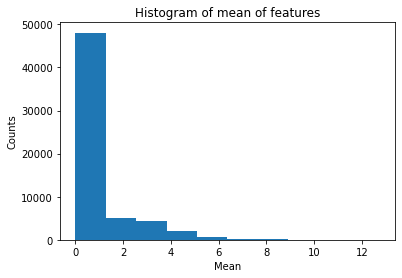

In [7]:
plt.hist(mean_vec)

plt.title('Histogram of mean of features')
plt.ylabel('Counts')
plt.xlabel('Mean')

Text(0.5, 0, 'Mean')

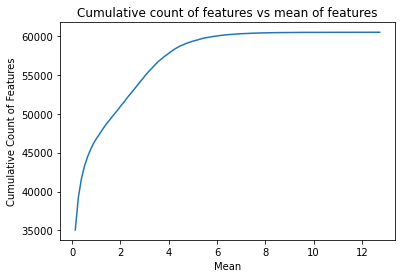

In [8]:
hist, bin_edges = np.histogram(mean_vec,bins=100)
plt.plot(bin_edges[1:],np.cumsum(hist))
plt.title('Cumulative count of features vs mean of features')
plt.ylabel('Cumulative Count of Features')
plt.xlabel('Mean')

## Standardize

In [9]:
X_df = data_BRCA_bone.drop(columns=['sample_id','bcr_patient_barcode','new_tumor_event_site',])
X_tumor_df = X_df[X_df['sample_type.samples']=="Primary Tumor"]
X_tumor_df = X_tumor_df.drop(columns = 'sample_type.samples')
scaler = StandardScaler()
scaler.fit_transform(X_tumor_df)
X_scaled = pd.DataFrame(scaler.transform(X_tumor_df))
X_scaled.columns = X_tumor_df.columns
X_scaled.index = X_tumor_df.index

## Drop according to mean and variance of each feature (This is currently not working, skip this part

In [10]:
'''
mean_vec = scaler.mean_
var_vec = scaler.var_
cutoff_num = 6 # We want 1-cutoff_prob of the distribution to be above this number
cutoff_prob=.05
keep_vec = []
zeros_vec = []
nan_vec = []
for ii in range(len(mean_vec)):
    mean = mean_vec[ii]
    variance = var_vec[ii]
    distribution = norm(loc=mean,scale=variance)
    cum_prob = distribution.cdf(cutoff_num)
    if np.isnan(cum_prob):
        nan_vec.append(ii)
    if cum_prob >= cutoff_prob: # Drop when cutoff_prob
        keep_vec.append(ii)
    if (mean_vec[ii] == 0) or (var_vec[ii] == 0):
        zeros_vec.append(ii)
    else:
        pass
'''

'\nmean_vec = scaler.mean_\nvar_vec = scaler.var_\ncutoff_num = 6 # We want 1-cutoff_prob of the distribution to be above this number\ncutoff_prob=.05\nkeep_vec = []\nzeros_vec = []\nnan_vec = []\nfor ii in range(len(mean_vec)):\n    mean = mean_vec[ii]\n    variance = var_vec[ii]\n    distribution = norm(loc=mean,scale=variance)\n    cum_prob = distribution.cdf(cutoff_num)\n    if np.isnan(cum_prob):\n        nan_vec.append(ii)\n    if cum_prob >= cutoff_prob: # Drop when cutoff_prob\n        keep_vec.append(ii)\n    if (mean_vec[ii] == 0) or (var_vec[ii] == 0):\n        zeros_vec.append(ii)\n    else:\n        pass\n'

# Drop according to mean (Drop if mean < 6, keep if mean >=6)

In [11]:
mean_vec = scaler.mean_
var_vec = scaler.var_

In [12]:
mean_vec<6

array([ True,  True,  True, ...,  True,  True,  True])

In [13]:
X_filtered = X_scaled[X_scaled.columns[mean_vec>=6]]

# Principal Component Analysis

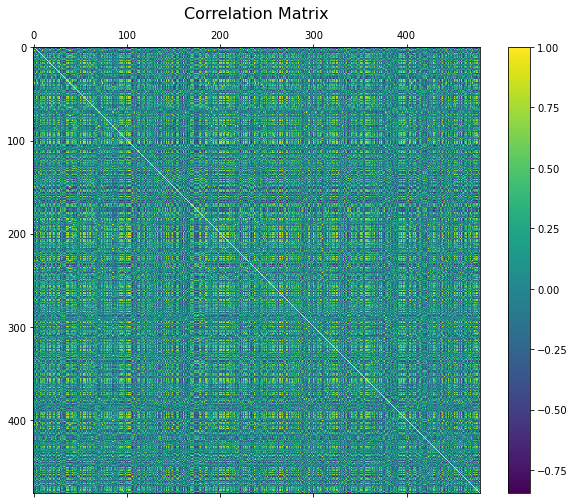

In [14]:
f = plt.figure(figsize=(10, 8))
plt.matshow(X_filtered.corr(), fignum=f.number)
cb = plt.colorbar()
plt.title('Correlation Matrix', fontsize=16);

In [15]:
X = X_filtered.to_numpy()

In [16]:
xtx = (X-np.mean(X,0)).T@(X-np.mean(X,0))
eigval,eigvec = np.linalg.eigh(xtx)


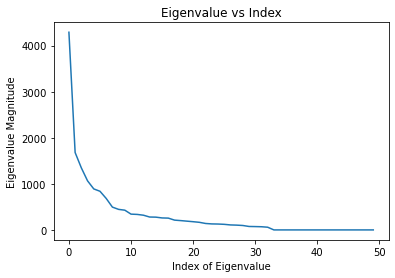

In [26]:
plt.plot(np.flip(eigval)[0:50])
plt.title('Eigenvalue vs Index')
plt.xlabel('Index of Eigenvalue')
plt.ylabel('Eigenvalue Magnitude')
plt.show()

In [18]:
components = eigvec[-1][np.absolute(eigvec[-1])>.05]

In [19]:
np.sum(np.multiply(components,components))

0.7697682618323348

# Sparse PCA 

In [20]:
from sklearn.decomposition import SparsePCA
sparsePCA_model = SparsePCA(n_components=2, random_state=0,alpha=1,)

In [21]:
prin_comps = sparsePCA_model.fit_transform(X_filtered.T)
#NOTE: principal components are arranged from most important component (first column) to least important component (last column)
#Each column is a principal component

In [22]:
prin_comps.shape

(479, 2)

In [23]:
alpha_vec = np.linspace(start=4.5, stop=5.6, num=50,) # alpha is the tuning parameter
num_features = X_filtered.shape[1]
prin_comps_vs_alpha_mat = np.zeros((num_features,len(alpha_vec)))
for ii,alpha in enumerate(alpha_vec):
    sparsePCA_model = SparsePCA(n_components=1, random_state=42,alpha=alpha,ridge_alpha=0,)
    sparsePCA_model.fit(X)
    prin_comps = sparsePCA_model.components_
    
    prin_comps_vs_alpha_mat[:,ii] = prin_comps.ravel()

(0.0, 1.0)

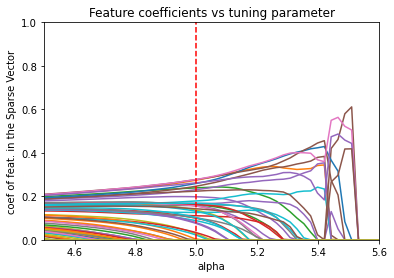

In [30]:
prin_comps_vs_alpha_mat.shape

for jj in range(num_features):
    plt.plot(alpha_vec,prin_comps_vs_alpha_mat[jj,:])

plt.xlabel('alpha')
plt.ylabel('coef of feat. in the Sparse Vector')
plt.title('Feature coefficients vs tuning parameter')
plt.plot([5,5],[-1,1],'--r')
plt.xlim([4.5,5.6])
plt.ylim([0,1])

In [25]:
# Sparse PCA for alpha=5
sparsePCA_model = SparsePCA(n_components=1, random_state=42,alpha=5,ridge_alpha=0,)
sparsePCA_model.fit(X)
# Get components
prin_comps = sparsePCA_model.components_
# Sort by order
sorted_comps = np.flip(np.sort(prin_comps))
arg_idx = np.flip(np.argsort(prin_comps,))
#Get the useful ones (the coefficient is effectively above 0),
useful_component_magnitude = sorted_comps[sorted_comps >.001]
sorted_features_by_magnitude =(X_filtered.columns[arg_idx])[:,0:len(useful_component_magnitude)].ravel()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Support for multi-dimensional indexing (e.g. `index[:, None]`) on an Index is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


In [32]:
for ii in range(len(useful_component_magnitude)):
    print(sorted_features_by_magnitude[ii],'\t', str(useful_component_magnitude[ii]))

ENSG00000105372.5 	 0.27759350681592654
ENSG00000142534.5 	 0.27718837501258664
ENSG00000130255.11 	 0.2744089113407151
ENSG00000105193.7 	 0.26202960466531744
ENSG00000108107.11 	 0.25928589024471044
ENSG00000170889.12 	 0.24670290926867522
ENSG00000197756.8 	 0.23887617547770468
ENSG00000142541.15 	 0.23078431802380373
ENSG00000105640.11 	 0.22363623479791916
ENSG00000142937.10 	 0.19787853251498455
ENSG00000063177.11 	 0.1787635635829626
ENSG00000149806.9 	 0.16771756639932792
ENSG00000136942.13 	 0.16746290426533303
ENSG00000162244.9 	 0.16308576654128737
ENSG00000167526.12 	 0.1606415448152228
ENSG00000233927.4 	 0.15823135734598925
ENSG00000071082.9 	 0.15717393274160665
ENSG00000142676.11 	 0.15573508439670697
ENSG00000109475.15 	 0.15485106399525797
ENSG00000221983.6 	 0.1424693882439549
ENSG00000144713.11 	 0.13612206173673178
ENSG00000137154.11 	 0.13087619435010367
ENSG00000099795.5 	 0.1255733130365842
ENSG00000115268.8 	 0.11063592639096638
ENSG00000114391.11 	 0.102037690